# Segmentaci&oacute;n

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data
import cv2

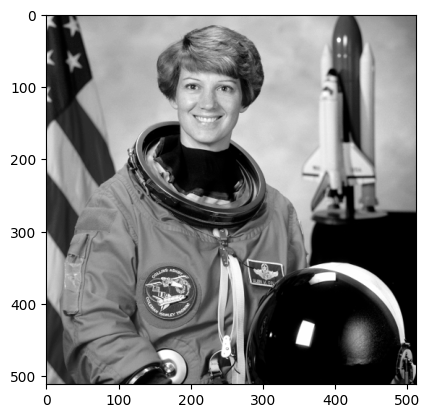

In [2]:
im = data.astronaut()
im = np.dot(im[:,:,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(im, cmap='gray')
plt.show()

## Crecimiento de regiones

In [ ]:
def region(im, s, threshold=5):
    n, m = im.shape
    out = np.zeros_like(im)
    stack = [s]
    while stack:
        u = stack.pop()
        out[u] = 1
        i, j = u
        adjs = [(i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j - 1), (i, j + 1),
                (i + 1, j - 1), (i + 1, j), (i + 1, j + 1)]
        for v in adjs:
            i, j = v
            if i < 0  or i >= n or j < 0 or j >= m:
                continue
            if out[v] == 0 \
               and im[v] >= im[s] - threshold \
               and im[v] <= im[s] + threshold:
                stack.append(v)
    return out

In [ ]:
out = region(im, (400, 330), threshold=10)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()

## Divisi&oacute;n de regiones

In [5]:
def division(im, out, color, threshold=10):
    n, m = im.shape
    avgcolor = np.mean(im)
    if avgcolor >= color - threshold and avgcolor <= color + threshold:
        out[:] = 1
        return

    rm = n // 2
    cm = m // 2
    if n > 1 and m > 1:
        division(im[:rm, :cm], out[:rm, :cm], color, threshold)
        division(im[rm:, :cm], out[rm:, :cm], color, threshold)
        division(im[:rm, cm:], out[:rm, cm:], color, threshold)
        division(im[rm:, cm:], out[rm:, cm:], color, threshold)
    elif n > 1:
        division(im[:, :cm], out[:, :cm], color, threshold)
        division(im[:, cm:], out[:, cm:], color, threshold)
    elif m > 1:
        division(im[:rm, :], out[:rm, :], color, threshold)
        division(im[rm:, :], out[rm:, :], color, threshold)

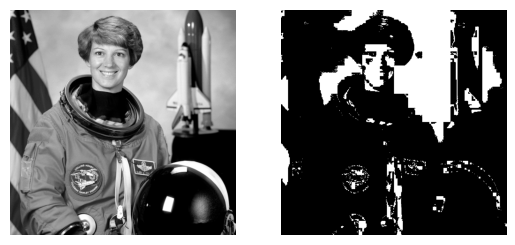

In [8]:
out = np.zeros_like(im)
division(im, out, 200)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()